<h1>Quantum Error Correction</h1>

## Imports

In [1]:
%matplotlib inline

In [9]:
from IPython.display import display

In [2]:
from sympy import init_printing
init_printing(use_latex=True)

In [3]:
from sympy import sqrt, symbols, Rational
from sympy import expand, Eq, Symbol, simplify, exp, sin
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.grover import *
from sympy.physics.quantum.qft import QFT, IQFT, Fourier
from sympy.physics.quantum.circuitplot import circuit_plot

<h2>5 qubit code</h2>

In [4]:
M0 = Z(1)*X(2)*X(3)*Z(4)
M0

In [5]:
M1 = Z(2)*X(3)*X(4)*Z(0)
M1

In [6]:
M2 = Z(3)*X(4)*X(0)*Z(1)
M2

In [7]:
M3 = Z(4)*X(0)*X(1)*Z(2)
M3

These operators should mutually commute.

In [8]:
gate_simp(Commutator(M0,M1).doit())

And square to the identity.

In [10]:
for o in [M0,M1,M2,M3]:
    display(gate_simp(o*o))

<h2>Codewords</h2>

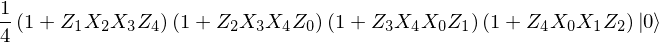

In [11]:
zero = Rational(1,4)*(1+M0)*(1+M1)*(1+M2)*(1+M3)*IntQubit(0, 5)
zero

In [12]:
qapply(4*zero)

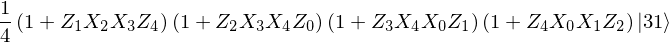

In [13]:
one = Rational(1,4)*(1+M0)*(1+M1)*(1+M2)*(1+M3)*IntQubit(2**5-1, 5)
one

In [14]:
qapply(4*one)

<h2>The encoding circuit</h2>

In [15]:
encoding_circuit = H(3)*H(4)*CNOT(2,0)*CNOT(3,0)*CNOT(4,0)*H(1)*H(4)*\
                   CNOT(2,1)*CNOT(4,1)*H(2)*CNOT(3,2)*CNOT(4,2)*H(3)*\
                   H(4)*CNOT(4, 3)*Z(4)*H(4)*Z(4)

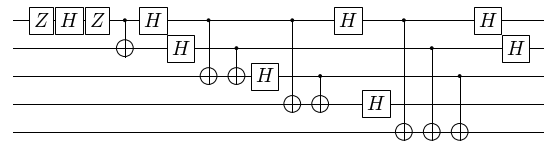

In [17]:
circuit_plot(encoding_circuit, nqubits=5, scale=0.5);

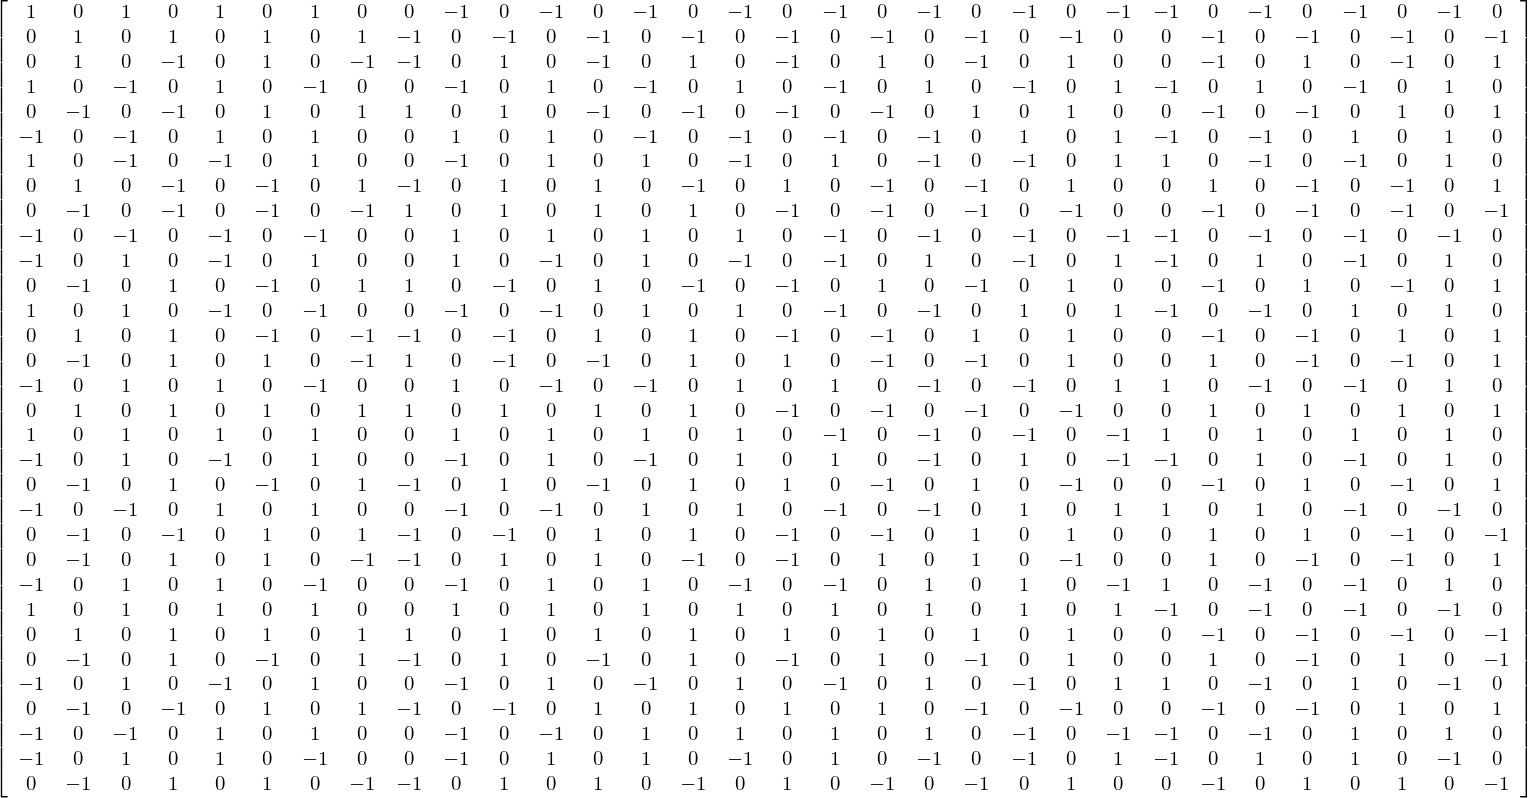

In [18]:
represent(4*encoding_circuit, nqubits=5)